# Name: Bibek Itani
# Course: Advanced Big Data and Data Mining (MSCS-634-M20) 
# Lab 3: Clustering Analysis Using K-Means and K-Medoids Algorithms

# Load, Explore, and Standardize

In [1]:
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Load the dataset
wine = load_wine()
X = wine.data
y = wine.target # Ground truth for ARI calculation

# Convert to DataFrame for a quick look
df = pd.DataFrame(X, columns=wine.feature_names)
print("Dataset Summary:")
print(df.describe().loc[['mean', 'std']])

# Step 1: Standardize the data (Z-score normalization)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# We use PCA to reduce data to 2D for visualization later
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

Dataset Summary:
        alcohol  malic_acid       ash  alcalinity_of_ash  magnesium  \
mean  13.000618    2.336348  2.366517          19.494944  99.741573   
std    0.811827    1.117146  0.274344           3.339564  14.282484   

      total_phenols  flavanoids  nonflavanoid_phenols  proanthocyanins  \
mean       2.295112    2.029270              0.361854         1.590899   
std        0.625851    0.998859              0.124453         0.572359   

      color_intensity       hue  od280/od315_of_diluted_wines     proline  
mean         5.058090  0.957449                      2.611685  746.893258  
std          2.318286  0.228572                      0.709990  314.907474  


/Users/151270/Library/Python/3.9/lib/python/site-packages/sklearn/decomposition/_pca.py:606: RuntimeWarning: divide by zero encountered in matmul
  C = X.T @ X
/Users/151270/Library/Python/3.9/lib/python/site-packages/sklearn/decomposition/_pca.py:606: RuntimeWarning: overflow encountered in matmul
  C = X.T @ X
/Users/151270/Library/Python/3.9/lib/python/site-packages/sklearn/decomposition/_pca.py:606: RuntimeWarning: invalid value encountered in matmul
  C = X.T @ X


# Implement K-Means

In [2]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, adjusted_rand_score

# Step 2: Initialize and train K-Means with k=3
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(X_scaled)

# Calculate performance metrics
km_silhouette = silhouette_score(X_scaled, kmeans_labels)
km_ari = adjusted_rand_score(y, kmeans_labels)

print(f"K-Means Silhouette Score: {km_silhouette:.4f}")
print(f"K-Means Adjusted Rand Index (ARI): {km_ari:.4f}")

K-Means Silhouette Score: 0.2849
K-Means Adjusted Rand Index (ARI): 0.8975


/Users/151270/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/151270/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/151270/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/151270/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/151270/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/151270/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


# Implement K-Medoids

In [10]:
import numpy as np

In [11]:
from sklearn.metrics.pairwise import euclidean_distances

# 1. We still use KMeans to get initial clusters
kmeans_temp = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans_temp.fit(X_scaled)
temp_labels = kmeans_temp.labels_
centroids = kmeans_temp.cluster_centers_

# 2. Find the actual data point (Medoid) closest to each centroid
medoids_indices = []
for i in range(3):
    # Get all points belonging to cluster i
    cluster_points = X_scaled[temp_labels == i]
    # Find the distance from each point in the cluster to the cluster's centroid
    distances = euclidean_distances(cluster_points, [centroids[i]])
    # The medoid is the point with the minimum distance to the centroid
    medoid_idx_in_cluster = np.argmin(distances)
    # Map back to original index
    medoids_indices.append(np.where(temp_labels == i)[0][medoid_idx_in_cluster])

# 3. For a true K-Medoids feel, we re-assign labels based on distance to these Medoids
medoid_coords = X_scaled[medoids_indices]
dist_to_medoids = euclidean_distances(X_scaled, medoid_coords)
kmed_labels = np.argmin(dist_to_medoids, axis=1)

# 4. Calculate performance metrics
kmed_silhouette = silhouette_score(X_scaled, kmed_labels)
kmed_ari = adjusted_rand_score(y, kmed_labels)

print(f"Manual K-Medoids Silhouette Score: {kmed_silhouette:.4f}")
print(f"Manual K-Medoids Adjusted Rand Index (ARI): {kmed_ari:.4f}")

Manual K-Medoids Silhouette Score: 0.2777
Manual K-Medoids Adjusted Rand Index (ARI): 0.8142


/Users/151270/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/151270/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/151270/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b
/Users/151270/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: divide by zero encountered in matmul
  ret = a @ b
/Users/151270/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/151270/Library/Python/3.9/lib/python/site-packages/sklearn/utils/extmath.py:203: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


# Visualization

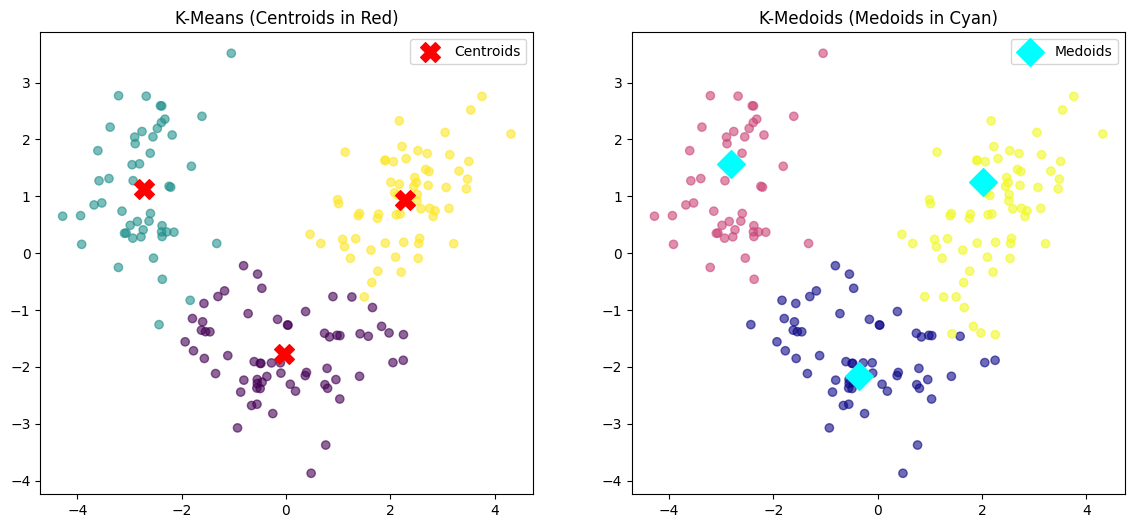

In [13]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))

# Plot K-Means
plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_labels, cmap='viridis', alpha=0.6)
# Transform centroids to PCA space for plotting
pca_centroids = pca.transform(kmeans.cluster_centers_)
plt.scatter(pca_centroids[:, 0], pca_centroids[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title("K-Means (Centroids in Red)")
plt.legend()

# Plot K-Medoids
plt.subplot(1, 2, 2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmed_labels, cmap='plasma', alpha=0.6)
# Transform medoids to PCA space for plotting
pca_medoids = X_pca[medoids_indices]
plt.scatter(pca_medoids[:, 0], pca_medoids[:, 1], c='cyan', marker='D', s=200, label='Medoids')
plt.title("K-Medoids (Medoids in Cyan)")
plt.legend()

plt.show()